In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

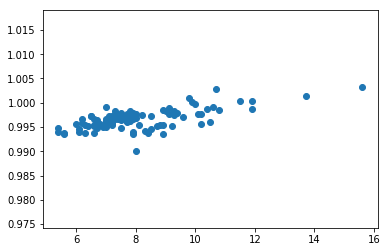

In [44]:
x = pd.read_csv("./data/linearX.csv")
y = pd.read_csv("./data/linearY.csv")
x = x.values
y = y.values
plt.scatter(x,y)
plt.plot(x,Y)
plt.show()

C:\Users\Prabhat\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in add
  if __name__ == '__main__':
C:\Users\Prabhat\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
C:\Users\Prabhat\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in add
C:\Users\Prabhat\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in subtract


[0.99663414] [nan]


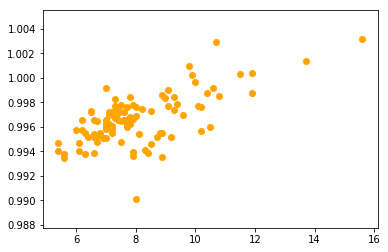

In [43]:
def hypothesis(theta_not, theta_one, x):
    Y = theta_not + (theta_one*x)
    return Y

def error(x, y, theta_not, theta_one):
    m = x.shape[0]
    total_error = 0.0
    for i in range(m):
        total_error = total_error + (hypothesis(theta_not, theta_one, x) - y[i])**2
    return 0.5*total_error

def derivative_theta_not(theta_not, theta_one, x, y):
    total_sum = 0.0
    m = y.shape[0]
    for i in range(m):
        total_sum = total_sum + (hypothesis(theta_not, theta_one, x[i]) - y[i])
    return total_sum

def derivative_theta_one(theta_not, theta_one, x, y):
    total_sum = 0.0
    m = y.shape[0]
    for i in range(m):
        total_sum = total_sum + ((hypothesis(theta_not, theta_one, x[i]) - y[i]))*x[i]
    return total_sum

def theta_not_fn(x, y, learning_rate, max_iterations):
    theta_not = 0.0
    theta_one = 0.0
    ce = []
    for i in range(max_iterations):
        der = derivative_theta_not(theta_not, theta_one, x, y)
        theta_not_error = error(x, y, theta_not, theta_one)
        theta_not = theta_not - learning_rate*der
        ce.append(theta_not_error)
    return theta_not, ce

def theta_one_fn(x, y, learning_rate, max_iterations):
    theta_not = 0.0
    theta_one = 0.0
    ce = []
    for i in range(max_iterations):
        der = derivative_theta_one(theta_not, theta_one, x, y)
        theta_one_error = error(x, y, theta_not, theta_one)
        theta_one = theta_one - learning_rate*der
        ce.append(theta_one_error)
    return theta_one,ce               

a, b = theta_not_fn(x, y, learning_rate = 0.001, max_iterations = 500) #not_theta
c, d = theta_one_fn(x, y, learning_rate = 0.001, max_iterations = 500) #one_theta

print(a,c)

Y = hypothesis(a, c, x)
plt.plot(x,Y)
plt.scatter(x,y, color = "orange")
plt.show()